TRABAJO FINAL

OBJETIVO:
Un primer acercamiento exploratorio de las variables "condiciones de vivienda" y "acceso a servicios básicos" utilizando las sesiones del curso de capacitación en fundamentos de programación en Python 2025 (con énfasis en manejo de datos y visualización de gráficos) y la base de datos Enaho 01-2022-100.

LIMPIEZA DE DATOS

In [579]:
#1. LIMPIEZA DE LA BASE DE DATOS
import pandas as pd
import altair as alt

# Definir las rutas
locacion_datos_vivienda = r"C:\Users\alexa\OneDrive\Documentos\GitHub\repositorio-propio-de-python-q-lab\Bases de datos_ T2\Enaho01-2022-100.csv"

# Cargar los datos
df = pd.read_csv(locacion_datos_vivienda, encoding='latin-1')

# Convertir los nombres de columnas a minúsculas
df.columns = df.columns.str.lower()

In [580]:
# Renombrar las columnas con nombres más cortos
df = df.rename(columns={
    "p102": "paredes",         # Material de paredes
    "p103": "piso",            # Material del piso
    "p103a": "techo",          # Material del techo
    "p104": "habitaciones",    # Número de habitaciones
    "p104a": "habit_dormir",   # Número de habitaciones para dormir
    "p110": "agua_potable",    # Acceso a agua potable
    "p1121": "alumbrado_elec", # Alumbrado - Electricidad
    "p1123": "alumbrado_gas",  # Alumbrado - Petróleo/Gas
    "p1125": "alumbrado_gen",  # Alumbrado - Generador
    "p1127": "sin_alumbrado",  # No utiliza alumbrado
    "ubigeo": "ubicacion",     # Ubicación geográfica
    "estrato": "estrato"       # Estrato geográfico
})

# Verificar los nombres de las columnas después del renombrado
print("Columnas después del renombrado:", df.columns)


Columnas después del renombrado: Index(['año', 'mes', 'conglome', 'vivienda', 'hogar', 'ubicacion', 'dominio',
       'estrato', 'periodo', 'tipenc',
       ...
       'nbi4', 'nbi5', 'factor07', 'nconglome', 'sub_conglome', 'codccpp',
       'nomccpp', 'longitud', 'latitud', 'altitud'],
      dtype='object', length=324)


In [581]:
# Filtrado según las variables seleccionadas
variables_seleccionadas = [
    "paredes",         # Material de paredes
    "piso",            # Material del piso
    "techo",           # Material del techo
    "habitaciones",    # Número de habitaciones
    "habit_dormir",    # Número de habitaciones para dormir
    "agua_potable",    # Acceso a agua potable
    "alumbrado_elec",  # Alumbrado - Electricidad
    "alumbrado_gas",   # Alumbrado - Petróleo/Gas
    "alumbrado_gen",   # Alumbrado - Generador
    "sin_alumbrado",   # No utiliza alumbrado
    "ubicacion",       # Ubicación geográfica
    "estrato"          # Estrato geográfico
]

# Seleccionar únicamente las columnas disponibles
columnas_disponibles = [col for col in variables_seleccionadas if col in df.columns]
df = df[columnas_disponibles]


In [582]:
# Reemplazar valores nulos en variables categóricas y numéricas
df["paredes"] = df["paredes"].fillna("Sin información")
df["piso"] = df["piso"].fillna("Sin información")
df["techo"] = df["techo"].fillna("Sin información")
df["agua_potable"] = df["agua_potable"].fillna("Sin información")
df["habitaciones"] = df["habitaciones"].fillna(0)  # Número de habitaciones
df["habit_dormir"] = df["habit_dormir"].fillna(0)  # Número de habitaciones para dormir

EXPLORACION DE DATOS

In [584]:
# Selección de las primeras filas 
print("Primeras filas:")
print(df.iloc[:10])  

Primeras filas:
  paredes piso techo habitaciones habit_dormir agua_potable alumbrado_elec  \
0       3    3     2            1            0            1              1   
1       4    5     2            1            1            2              1   
2       3    3     3            6            4            1              1   
3                                                                            
4       1    3     1            3            2            1              1   
5                                                                            
6                                                                            
7                                                                            
8                                                                            
9                                                                            

  alumbrado_gas alumbrado_gen sin_alumbrado  ubicacion  estrato  
0             0             0             0      10101     

In [585]:
# Exploración de columnas específicas
print(df.iloc[:, [0, 1, 2, 3, 4]])

      paredes piso techo habitaciones habit_dormir
0           3    3     2            1            0
1           4    5     2            1            1
2           3    3     3            6            4
3                                                 
4           1    3     1            3            2
...       ...  ...   ...          ...          ...
44117       3    6     4            6            4
44118       3    4     4            5            3
44119       3    6     4            7            5
44120                                             
44121       3    4     4            6            5

[44122 rows x 5 columns]


In [586]:
# Resumen estadístico 
print("Resumen estadístico general de las variables numéricas:")
print(df.describe())

Resumen estadístico general de las variables numéricas:
           ubicacion       estrato
count   44122.000000  44122.000000
mean   130280.962717      4.154821
std     67838.544582      2.433697
min     10101.000000      1.000000
25%     70106.000000      2.000000
50%    140104.000000      4.000000
75%    180301.000000      7.000000
max    250305.000000      8.000000


In [587]:
# Exploración de Condición: Viviendas con acceso a agua potable
cond_agua_potable = df["agua_potable"] != "Sin información"
viviendas_agua_potable = df[cond_agua_potable]
print("\nViviendas con acceso a agua potable:")
print(viviendas_agua_potable.head())


Viviendas con acceso a agua potable:
  paredes piso techo habitaciones habit_dormir agua_potable alumbrado_elec  \
0       3    3     2            1            0            1              1   
1       4    5     2            1            1            2              1   
2       3    3     3            6            4            1              1   
3                                                                            
4       1    3     1            3            2            1              1   

  alumbrado_gas alumbrado_gen sin_alumbrado  ubicacion  estrato  
0             0             0             0      10101        4  
1             0             0             0      10101        4  
2             0             0             0      10101        4  
3                                                10101        4  
4             0             0             0      10101        4  


las viviendas con acceso a agua potable no solo tienen una ventaja en servicios básicos, sino que podrían estar asociadas con mejores condiciones estructurales y mayor tamaño.

TRANSFORMACIÓN DE BASE DE DATOS

In [590]:
# Convertir 'paredes' a numérico
df["paredes"] = pd.to_numeric(df["paredes"], errors="coerce")

# Verificar valores 
print("Valores únicos antes del renombramiento:")
print(df["paredes"].unique())

# Renombramiento a valores de la variable 'paredes'
df["paredes"] = df["paredes"].replace({
    1: "Ladrillo o bloque de cemento",
    2: "Piedra o sillar con cal o cemento",
    3: "Adobe",
    4: "Tapia",
    5: "Quincha (caña con barro)",
    6: "Piedra con barro",
    7: "Madera (pona, tornillo, etc)",
    8: "Tripley/calamina/estera",
    9: "Otro material"
}).fillna("Sin Información")

# Verificar valores únicos después de renombrar
print("Valores después del renombramiento:")
print(df["paredes"].unique())

Valores únicos antes del renombramiento:
[ 3.  4. nan  1.  7.  9.  5.  6.  2.  8.]
Valores después del renombramiento:
['Adobe' 'Tapia' 'Sin Información' 'Ladrillo o bloque de cemento'
 'Madera (pona, tornillo, etc)' 'Otro material' 'Quincha (caña con barro)'
 'Piedra con barro' 'Piedra o sillar con cal o cemento'
 'Tripley/calamina/estera']


In [591]:
# Convertir "techo" a tipo numérico 
df["techo"] = pd.to_numeric(df["techo"], errors="coerce")
# Renombramiento'techo'
df["techo"] = df["techo"].replace({
    1: "Concreto armado",
    2: "Madera",
    3: "Tejas",
    4: "Planchas de calamina, fibra de cemento o similares",
    5: "Caña o estera con torta de barro o cemento",
    6: "Tripley/esteras/carrizo",
    7: "Paja, hojas de palmera",
    8: "Otro material"
}).fillna("Sin Información")

print("Valores después del renombramiento:")
print(df["techo"].unique())

Valores después del renombramiento:
['Madera' 'Tejas' 'Sin Información' 'Concreto armado'
 'Caña o estera con torta de barro o cemento'
 'Planchas de calamina, fibra de cemento o similares'
 'Paja, hojas de palmera' 'Tripley/esteras/carrizo' 'Otro material']


In [592]:
# Convertir "piso" a tipo numérico 
df["piso"] = pd.to_numeric(df["piso"], errors="coerce")
# Renombramiento"piso"
df["piso"] = df["piso"].replace({
    1: "Parquet o madera pulida",
    2: "Láminas asfálticas, vinílicos o similares",
    3: "Losetas, terrazos o similares",
    4: "Madera (pona, tornillo, etc)",
    5: "Cemento",
    6: "Tierra",
    7: "Otro material"
}).fillna("Sin Información")
print("Valores después del renombramiento:")
print(df["piso"].unique())

Valores después del renombramiento:
['Losetas, terrazos o similares' 'Cemento' 'Sin Información'
 'Madera (pona, tornillo, etc)'
 'Láminas asfálticas, vinílicos o similares' 'Tierra'
 'Parquet o madera pulida' 'Otro material']


In [593]:
# Condición exploratoria: Viviendas con paredes de "Adobe"
cond_paredes_adobe = df["paredes"] == "Adobe"
viviendas_adobe = df[cond_paredes_adobe]

# Mostrar los primeros resultados
print("Viviendas con paredes de adobe:")
print(viviendas_adobe.head())

# Cantidad de viviendas con paredes de adobe
cantidad_adobe = viviendas_adobe.shape[0]
print(f"Cantidad total de viviendas con paredes de adobe: {cantidad_adobe}")


Viviendas con paredes de adobe:
   paredes                           piso  \
0    Adobe  Losetas, terrazos o similares   
2    Adobe  Losetas, terrazos o similares   
10   Adobe   Madera (pona, tornillo, etc)   
11   Adobe                        Cemento   
14   Adobe                        Cemento   

                                                techo habitaciones  \
0                                              Madera            1   
2                                               Tejas            6   
10         Caña o estera con torta de barro o cemento            1   
11         Caña o estera con torta de barro o cemento            1   
14  Planchas de calamina, fibra de cemento o simil...            2   

   habit_dormir agua_potable alumbrado_elec alumbrado_gas alumbrado_gen  \
0             0            1              1             0             0   
2             4            1              1             0             0   
10            1            2              1        

Hay un total de 8410 viviendas que tienen paredes de adobe, lo que refleja una alta prevalencia de este material en la construcción, posiblemente en zonas rurales o en áreas con menor acceso a materiales más modernos. Esto puede estar relacionado con limitaciones económicas o con la accesibilidad a otros materiales de construcción en esas regiones.

In [595]:
# Crear la columna 'zona'
df["zona"] = df["estrato"].apply(lambda x: "Rural" if x > 6 else "Urbano")

# Condición para analizar
cond_zona_rural = df["zona"] == "Rural"
viviendas_rurales = df[cond_zona_rural]
print("Viviendas en zonas rurales:")
print(viviendas_rurales.head())

Viviendas en zonas rurales:
                         paredes                          piso  \
69  Madera (pona, tornillo, etc)  Madera (pona, tornillo, etc)   
70  Madera (pona, tornillo, etc)  Madera (pona, tornillo, etc)   
71  Madera (pona, tornillo, etc)                        Tierra   
72  Madera (pona, tornillo, etc)  Madera (pona, tornillo, etc)   
73  Madera (pona, tornillo, etc)                        Tierra   

                                                techo habitaciones  \
69  Planchas de calamina, fibra de cemento o simil...            3   
70                             Paja, hojas de palmera            2   
71                             Paja, hojas de palmera            5   
72                             Paja, hojas de palmera            4   
73                             Paja, hojas de palmera            4   

   habit_dormir agua_potable alumbrado_elec alumbrado_gas alumbrado_gen  \
69            1            8              0             0             0   
70  

In [596]:
df["habitaciones"] = pd.to_numeric(df["habitaciones"], errors="coerce")
# Condición: Viviendas rurales con más de 3 habitaciones y acceso a agua potable
cond_rural_habitaciones_agua = (
    (df["zona"] == "Rural") &
    (df["habitaciones"] > 3) &
    (df["agua_potable"] != "Sin Información")
)

# Filtrar el DataFrame
viviendas_rural_habitaciones_agua = df[cond_rural_habitaciones_agua]

# Mostrar los primeros resultados
print("Viviendas rurales con más de 3 habitaciones y acceso a agua potable:")
print(viviendas_rural_habitaciones_agua.head())

# Cantidad total de viviendas que cumplen la condición
cantidad_rural_habitaciones_agua = viviendas_rural_habitaciones_agua.shape[0]
print(f"Cantidad total de viviendas rurales con más de 3 habitaciones y acceso a agua potable: {cantidad_rural_habitaciones_agua}")


Viviendas rurales con más de 3 habitaciones y acceso a agua potable:
                         paredes                          piso  \
71  Madera (pona, tornillo, etc)                        Tierra   
72  Madera (pona, tornillo, etc)  Madera (pona, tornillo, etc)   
73  Madera (pona, tornillo, etc)                        Tierra   
74  Madera (pona, tornillo, etc)  Madera (pona, tornillo, etc)   
95  Ladrillo o bloque de cemento                       Cemento   

                                                techo  habitaciones  \
71                             Paja, hojas de palmera           5.0   
72                             Paja, hojas de palmera           4.0   
73                             Paja, hojas de palmera           4.0   
74  Planchas de calamina, fibra de cemento o simil...           5.0   
95  Planchas de calamina, fibra de cemento o simil...           4.0   

   habit_dormir agua_potable alumbrado_elec alumbrado_gas alumbrado_gen  \
71            3            8    

existen 3133 viviendas rurales que cumplen con la condición de tener más de 3 habitaciones y acceso a agua potable. En estas viviendas, predominan materiales como madera en paredes y pisos, así como paja o hojas de palmera en techos, indicando un nivel estructural básico. 

GRAFICOS

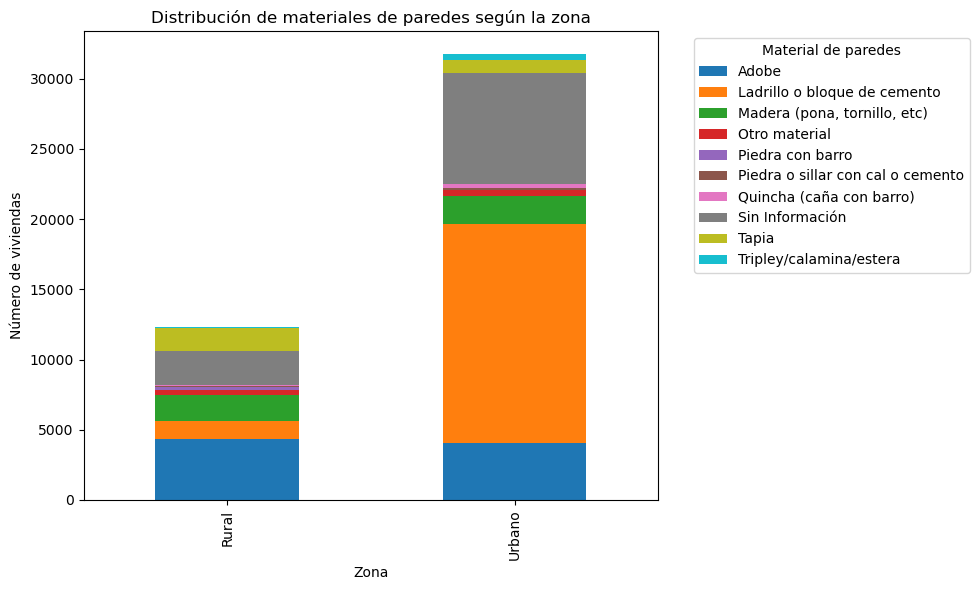

In [616]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear una tabla resumen para el gráfico
resumen_materiales = df.groupby(['zona', 'paredes']).size().unstack(fill_value=0)

# Crear el gráfico de barras apiladas
resumen_materiales.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribución de materiales de paredes según la zona')
plt.xlabel('Zona')
plt.ylabel('Número de viviendas')
plt.legend(title='Material de paredes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Se observa que en las zonas rurales predomina el uso de materiales como adobe y madera, mientras que en las zonas urbanas prevalecen materiales más sólidos como ladrillos o bloques de cemento. Esto da una primer vistazo a desigualdad en las condiciones de vivi

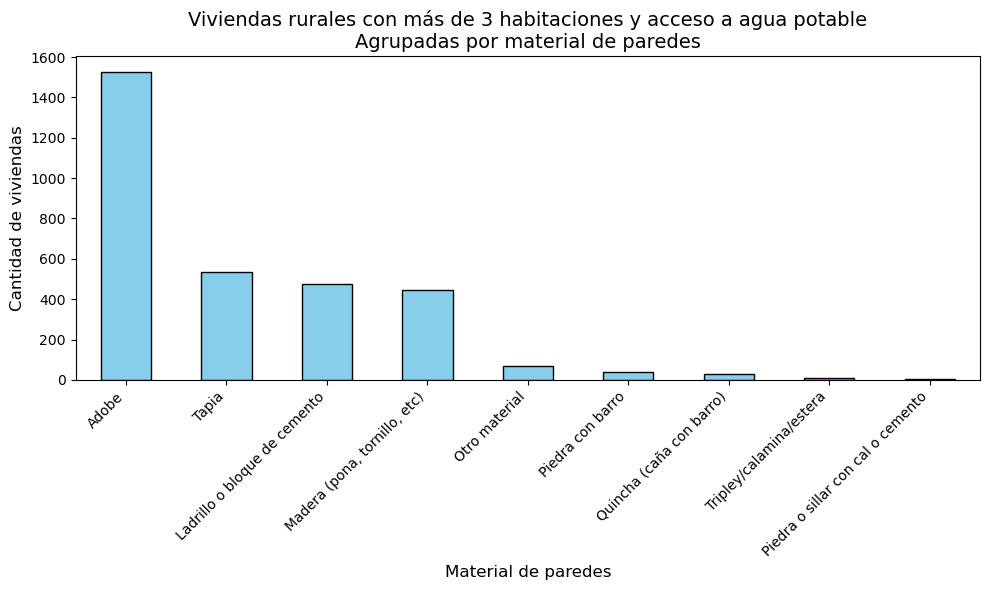

In [618]:
import matplotlib.pyplot as plt

# Agrupar los datos por material de paredes y contar
grouped_data = viviendas_rural_habitaciones_agua.groupby('paredes').size().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='skyblue', edgecolor='black')

# Agregar título y etiquetas
plt.title('Viviendas rurales con más de 3 habitaciones y acceso a agua potable\nAgrupadas por material de paredes', fontsize=14)
plt.xlabel('Material de paredes', fontsize=12)
plt.ylabel('Cantidad de viviendas', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [599]:
#Guardado de datos
df.to_csv("datos_procesados.csv")